<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/8%3A%20KNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##K-nearest neighbour algorithm

Maybe I can try this too? We'll see.. This don't realy needs to be in this notebook, but it's an idea that I can explore maybe one of the next days.

First **loading data**

In [2]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)
features.describe()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4300.157125,4009.273150,4263.860860,4122.616195,4341.606870,4620.061720,4072.151250,4615.229300,4200.893915,4230.573235,4201.583060,4278.445325,4605.169335,4359.852780
std,36.361719,29.853264,20.788323,20.565528,16.691038,18.034865,20.933632,18.391027,17.810272,19.661149,24.397269,19.645651,33.067591,37.074555
min,4197.950000,3905.640000,4202.560000,4058.460000,4310.260000,4569.740000,4032.820000,4571.280000,4147.690000,4158.970000,4107.180000,4216.410000,4454.360000,4225.640000
25%,4280.510000,3990.770000,4250.260000,4108.720000,4331.790000,4611.790000,4057.440000,4604.100000,4190.260000,4219.490000,4189.740000,4267.180000,4590.642500,4342.050000
50%,4293.330000,4006.150000,4262.560000,4121.030000,4338.460000,4617.950000,4069.740000,4612.820000,4199.490000,4228.720000,4200.000000,4276.410000,4603.080000,4354.360000
75%,4309.740000,4023.590000,4270.260000,4133.460000,4347.180000,4626.150000,4083.590000,4623.080000,4209.230000,4238.970000,4211.280000,4286.150000,4617.950000,4371.790000
max,4497.440000,4152.820000,4385.640000,4234.360000,4452.820000,4754.870000,4174.870000,4731.280000,4315.380000,4352.310000,4325.640000,4397.950000,4796.920000,4538.970000


In [3]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9416970267245498


In [0]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [0]:
from sklearn.model_selection import GridSearchCV

neighbors = [2,3,4,5,6,7]
weigh = ['uniform', 'distance']

params = dict(n_neighbors=neighbors, weights=weigh)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc')
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'n_neighbors': 4, 'weights': 'distance'}
0.9521128334736145
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')


In [0]:
model = KNeighborsClassifier(n_neighbors=4, weights='distance')

score = cross_val_score(model, features, trainset.label, scoring='roc_auc', cv=10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9593817283633796


Now I try the same for different scaling methods.

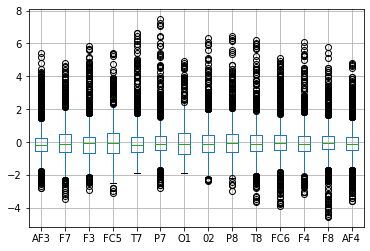

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)
features.boxplot()

In [0]:
model = KNeighborsClassifier()

score = cross_val_score(model, features, trainset.label, scoring='roc_auc', cv=10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9402972628798316


In [0]:
from sklearn.model_selection import GridSearchCV

neighbors = [2,3,4,5,6,7]
weigh = ['uniform', 'distance']

params = dict(n_neighbors=neighbors, weights=weigh)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc')
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'n_neighbors': 5, 'weights': 'distance'}
0.9475137414407451
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


In [0]:
model = grid_search.best_estimator_

score = cross_val_score(model, features, trainset.label, scoring='roc_auc', cv=10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9548053129337534


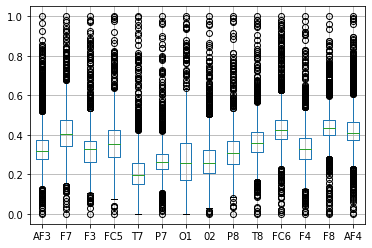

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)
features.boxplot()

In [0]:
model = KNeighborsClassifier()

score = cross_val_score(model, features, trainset.label, scoring='roc_auc', cv=10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9401210659880386


In [0]:
from sklearn.model_selection import GridSearchCV

neighbors = [2,3,4,5,6,7]
weigh = ['uniform', 'distance']

params = dict(n_neighbors=neighbors, weights=weigh)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc')
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'n_neighbors': 4, 'weights': 'distance'}
0.9473771218963265
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')


In [0]:
model = grid_search.best_estimator_

score = cross_val_score(model, features, trainset.label, scoring='roc_auc', cv=10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9549063423834067


The model performs best on non scaled data.

For this last day, I try to optimize my models by adding more cross validation:

In [5]:
from sklearn.model_selection import GridSearchCV

neighbors = [2,3,4,5,6,7]
weigh = ['uniform', 'distance']
ps = [1,1.5,2,2.5,3]
leafs = [20,25,30,35,40]

params = dict(n_neighbors=neighbors, weights=weigh,p=ps, leaf_size=leafs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'leaf_size': 20, 'n_neighbors': 4, 'p': 2.5, 'weights': 'distance'}
0.9612608329673547
KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')


I will now refine leaf_size, as this is the lowest of all values that I tested for this parameter:

In [6]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier(algorithm='auto', metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')
leafs = [10,15,18,20,22,25]

params = dict(leaf_size=leafs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'leaf_size': 10}
0.9612608329673547
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')


In [7]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier(algorithm='auto', metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')
leafs = [3,5,8,9,10,15,20]

params = dict(leaf_size=leafs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'leaf_size': 3}
0.9612608329673547
KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')


In [9]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier(algorithm='auto', metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')
leafs = [1,2,3]

params = dict(leaf_size=leafs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'leaf_size': 1}
0.9612608329673547
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')


Ok leaf_size doesn't realy matter once it is under 30 for this model apperently..

In [11]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')
0.9612608329673547
